## We will be reading our processed dataset named Absenteeism_Last and establishing a prediction model by using the "Absenteeism Time in Hours" column using Logistic Regression model.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
df = pd.read_csv('Absenteeism_Last.csv')

In [43]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


If we need to classify the column we will predict before applying our classification type model; I thought we could classify according to median in Absenteeism Time in Hours data. That is to divide it into two as those above the median and those below the median.

In [44]:
df["Absenteeism Time in Hours"].median()

3.0

In other words, I want to be able to say "Low Level Absenteeism" for those who are absent for 3 hours or less, and "High Level Absentee" for those who have 4 hours or more absenteeism.
In this case, I will label the target that I will guess by naming these two variable states "0" and "1". Accordingly, by using the "where" function from the numpy library, I want to assign the data of my target column as 1 if it is above 3, and 0 if it is below 3;

In [45]:
targets = np.where(df["Absenteeism Time in Hours"] > df["Absenteeism Time in Hours"].median(),1,0)

In [46]:
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [47]:
#adding the new column to the dataset; 
df["Excessive Absenteeism"] = targets

In [48]:
targets.sum() / targets.shape[0]

0.45571428571428574

In [49]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


In [50]:
#dropping Absenteeism Time in Hours column;
data_with_targets = df.drop(["Absenteeism Time in Hours"], axis = 1)

In [51]:
data_with_targets.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0


In [52]:
data_with_targets.shape

(700, 15)

## I will decide which features to use as input for Logistic Regression. I am assigning to my x and y columns.


In [53]:
X = data_with_targets.iloc[:,:-1]
y = data_with_targets["Excessive Absenteeism"]
X.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1


In [54]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Excessive Absenteeism, dtype: int64

In [55]:
#Standardizing the data;
from sklearn.preprocessing import StandardScaler

absenteeism_scaler = StandardScaler()

absenteeism_scaler.fit(X)
X_scaled = absenteeism_scaler.transform(X)
X_scaled

array([[-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         0.88046927,  0.26848661],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.01928035, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.91902997, -0.58968976],
       ...,
       [ 1.73205081, -0.09298136, -0.31448545, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.01928035,  0.26848661]])

In [56]:
X_scaled.shape

(700, 14)

In [57]:
#Splitting the data into train and test

from sklearn.model_selection import train_test_split

train_test_split(X_scaled, targets)


[array([[ 1.73205081, -0.09298136, -0.31448545, ..., -0.44798003,
         -0.01928035,  1.12666297],
        [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         -0.01928035,  0.26848661],
        [ 1.73205081, -0.09298136, -0.31448545, ..., -0.44798003,
         -0.91902997, -0.58968976],
        ...,
        [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         -0.91902997, -0.58968976],
        [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         -0.91902997, -0.58968976],
        [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
          0.88046927, -0.58968976]]),
 array([[-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
          0.88046927,  0.26848661],
        [ 1.73205081, -0.09298136, -0.31448545, ..., -0.44798003,
         -0.91902997, -0.58968976],
        [ 1.73205081, -0.09298136, -0.31448545, ...,  2.23224237,
          0.88046927, -0.58968976],
        ...,
        [-0.57735027, -0.09298136, -0.31448545, ..., -

In [58]:
#I'll split 80/20 and choose 20 for random_state for shuffle
x_train, x_test, y_train, y_test = train_test_split(X_scaled, targets, train_size = 0.8, random_state = 20)

In [59]:
print(x_train.shape, y_train.shape)

(560, 14) (560,)


In [60]:
print(x_test.shape, y_test.shape)

(140, 14) (140,)


In [61]:
#now i will import to apply my Logistic Regression model and import metrics module for performance measurement 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 


In [62]:
#train the model;
reg = LogisticRegression()
reg.fit(x_train, y_train)

reg.score(x_train, y_train)

0.7839285714285714

In [63]:
#my model seems to have achieved 78% success. I'll go over the intercept and coefficients in my model's function.

reg.intercept_

array([-0.22206736])

In [64]:
reg.coef_

array([[ 2.07601767,  0.33504757,  1.56162303,  1.32927434,  0.18793677,
        -0.07062253,  0.70639316, -0.03986811, -0.20089491, -0.00456366,
         0.31933564, -0.135508  ,  0.38172443, -0.3332426 ]])

In [65]:
X.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Day of the Week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [66]:
#I want to display coefficients and intercept as dataframe, for this I will create two new columns 
feature_name = X.columns.values
summary_table = pd.DataFrame(columns = ["Feauture name"], data = feature_name)

summary_table["Coefficient"] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ["Intercept", reg.intercept_[0]]
summary_table = summary_table.sort_index()

summary_table

,Feauture name,Coefficient
0,Intercept,-0.222067
1,Reason_1,2.076018
2,Reason_2,0.335048
3,Reason_3,1.561623
4,Reason_4,1.329274
5,Month Value,0.187937
6,Day of the Week,-0.070623
7,Transportation Expense,0.706393
8,Distance to Work,-0.039868
9,Age,-0.200895


In [67]:
#the standardized coefficients have been obtained.
#Now I add the Odds ratio of the Logistic Regression model to the dataframe.
summary_table["Odds_ratio"] = np.exp(summary_table.Coefficient)
summary_table.sort_values("Odds_ratio", ascending = False) 

,Feauture name,Coefficient,Odds_ratio
1,Reason_1,2.076018,7.972656
3,Reason_3,1.561623,4.766551
4,Reason_4,1.329274,3.778301
7,Transportation Expense,0.706393,2.026668
13,Children,0.381724,1.464808
2,Reason_2,0.335048,1.398007
11,Body Mass Index,0.319336,1.376213
5,Month Value,0.187937,1.206757
10,Daily Work Load Average,-0.004564,0.995447
8,Distance to Work,-0.039868,0.960916


If the coefficient is close to 0 and the Odds ratio is close to 1, it can be said that the relevant feature is not important.
In other words, as we approach the opposite situation, we will say that the importance of feature increases.
According to this inference, the "Daily Work Load Average", "Distance to Work", "Day of the Week" features are the least effective.

## Applying model to test set

In [68]:
reg.score(x_test,y_test)

0.7357142857142858

The accuracy of the model is 74%, which is very close to the train data result (78%). Now I will calculate the probabilities of Excesive Absenteeism (0 or 1) to the model, where the result will be assumed 0 if the result is below 0.5, if p> 0.5 it will be assumed 1. 


In [69]:
predicted_proba = reg.predict_proba(x_test)
predicted_proba[:,1]

array([0.26135135, 0.41154339, 0.63236436, 0.18801911, 0.9386004 ,
       0.69257597, 0.70461825, 0.91893974, 0.19564389, 0.23961268,
       0.53728066, 0.84515245, 0.95380268, 0.27008962, 0.76859607,
       0.44869558, 0.4707524 , 0.44477256, 0.61802037, 0.97472366,
       0.30382016, 0.19541613, 0.62265098, 0.59996926, 0.81770839,
       0.23988216, 0.52949598, 0.11002375, 0.86422361, 0.2030314 ,
       0.38454827, 0.70459151, 0.70138178, 0.56363893, 0.19541613,
       0.54256241, 0.20504956, 0.82072323, 0.44466019, 0.61108219,
       0.20908782, 0.40281153, 0.21373621, 0.09844091, 0.84224496,
       0.66612989, 0.71672931, 0.26982044, 0.20155736, 0.17070043,
       0.5733945 , 0.08298962, 0.67931742, 0.28630329, 0.87253409,
       0.48546569, 0.9325331 , 0.2462249 , 0.08169672, 0.08239341,
       0.72795552, 0.6695154 , 0.31201864, 0.86026294, 0.1838827 ,
       0.2596655 , 0.0131662 , 0.22029913, 0.8123649 , 0.31453865,
       0.20433741, 0.07128014, 0.93325923, 0.46319471, 0.65517

I also want to apply the Maxiter module to measure the success of the model.

In [70]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)



In [71]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=10000)

logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [72]:

y_pred = logmodel.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0])

In [73]:
#accuracy scroe of test set
score = logmodel.score(x_test, y_test)
print(score)

0.75


In [74]:
#I want to observe coefficients
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logmodel.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X.columns,"Coefficients":np.transpose(logmodel.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)


                  Variables  Coefficients
0                 Intercept     -4.461849
1                  Reason_1      2.919501
2                  Reason_2      0.897170
3                  Reason_3      2.927636
4                  Reason_4      0.928998
5               Month Value      0.019958
6           Day of the Week     -0.199967
7    Transportation Expense      0.009215
8          Distance to Work      0.001844
9                       Age     -0.029359
10  Daily Work Load Average      0.000330
11          Body Mass Index      0.059314
12                Education      0.216729
13                 Children      0.393559
14                     Pets     -0.196926


In [77]:
#Checking the accuracy score of the train set 
score = logmodel.score(x_train, y_train)
print(score)

0.7821428571428571


In [78]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[57, 19],
       [16, 48]])

In [79]:
#there are 19 mistakes that I correctly guessed 57 of those absent in the top line of the array.
#The bottom line shows that I correctly predicted 48 of 64 absences in total.

In [80]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.75
Precision: 0.7164179104477612
Recall: 0.75


In [81]:
y_pred_proba = logmodel.predict_proba(x_test)[::,1]
y_pred_proba

array([0.20866695, 0.20699084, 0.34668307, 0.30854416, 0.16619973,
       0.76991628, 0.90408534, 0.23190216, 0.15498263, 0.36163117,
       0.23386405, 0.22007341, 0.2600755 , 0.76289337, 0.16174203,
       0.58662043, 0.23754836, 0.29677798, 0.25811411, 0.17707881,
       0.72093888, 0.31451246, 0.16124218, 0.94409692, 0.58967558,
       0.1293886 , 0.81200304, 0.15588279, 0.3377749 , 0.38548705,
       0.17786382, 0.08549039, 0.21293226, 0.87661807, 0.66236704,
       0.53623951, 0.91954632, 0.1061503 , 0.8959034 , 0.7403244 ,
       0.16703293, 0.76141987, 0.80309957, 0.5487779 , 0.55482347,
       0.20866695, 0.16892893, 0.2914141 , 0.25264939, 0.54423885,
       0.33121023, 0.34370438, 0.16146699, 0.77085486, 0.72179152,
       0.14368022, 0.21381583, 0.15040967, 0.79986674, 0.29118069,
       0.08976309, 0.75985308, 0.57776705, 0.24360562, 0.18558332,
       0.88237355, 0.89803487, 0.52303899, 0.50626451, 0.95461071,
       0.56697836, 0.56122627, 0.5735147 , 0.75146356, 0.55873

In [82]:
threshold = 0.3
y_pred = (y_pred_proba > threshold).astype('float')
y_pred

array([0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [83]:
metrics.confusion_matrix(y_test, y_pred)

array([[39, 37],
       [10, 54]])

In [84]:
threshold = 0.2
y_pred = (y_pred_proba > threshold).astype('float')
metrics.confusion_matrix(y_test, y_pred)

array([[20, 56],
       [ 7, 57]])

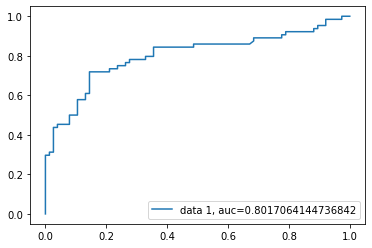

In [85]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

If the AUC of the model is above 90%, it can be said that it is very good, if it is between 80-90%, it can be said that there is a successful classification. AUC is 80.1%


In [86]:
#Now I want to measure the success of the model after dropping "Daily Work Load Average", "Distance to Work", "Day of the Week" features. 
data_with_targets= data_with_targets.drop(["Daily Work Load Average", "Distance to Work", "Day of the Week"], axis = 1)



In [87]:
data_with_targets

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,289,33,30,0,2,1,1
1,0,0,0,0,7,118,50,31,0,1,0,0
2,0,0,0,1,7,179,38,31,0,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0,1
4,0,0,0,1,7,289,33,30,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,179,40,22,1,2,0,1
696,1,0,0,0,5,225,28,24,0,1,2,0
697,1,0,0,0,5,330,28,25,1,0,0,1
698,0,0,0,1,5,235,32,25,1,0,0,0


In [88]:
X = data_with_targets.iloc[:,:-1]
y = data_with_targets["Excessive Absenteeism"]
X.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,289,33,30,0,2,1
1,0,0,0,0,7,118,50,31,0,1,0
2,0,0,0,1,7,179,38,31,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0
4,0,0,0,1,7,289,33,30,0,2,1


In [89]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


In [90]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(x_train,y_train)


LogisticRegression(max_iter=10000)

In [91]:

y_pred = logmodel.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0])

In [92]:
#testin accuracy skoru 
score = logmodel.score(x_test, y_test)
print(score)

0.7714285714285715


In [93]:
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logmodel.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X.columns,"Coefficients":np.transpose(logmodel.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                 Variables  Coefficients
0                Intercept     -4.656714
1                 Reason_1      2.909205
2                 Reason_2      1.035220
3                 Reason_3      2.983179
4                 Reason_4      0.883814
5              Month Value      0.013239
6   Transportation Expense      0.008807
7                      Age     -0.032983
8          Body Mass Index      0.068671
9                Education      0.164010
10                Children      0.366598
11                    Pets     -0.169284


In [94]:
# Using score method to get training accuracy of model
score = logmodel.score(x_train, y_train)
print(score)

0.775


In [95]:
# importing the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[58, 18],
       [14, 50]])

In [97]:
#accuracy, precision and recall scores
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7714285714285715
Precision: 0.7352941176470589
Recall: 0.78125


In [98]:
y_pred_proba = logmodel.predict_proba(x_test)[::,1]
y_pred_proba

array([0.21733111, 0.21508763, 0.43574679, 0.23114552, 0.14088183,
       0.68249835, 0.92506081, 0.28697945, 0.13770748, 0.38469023,
       0.18988248, 0.15748172, 0.43249454, 0.6865029 , 0.15568233,
       0.67673324, 0.29242781, 0.22416266, 0.21419347, 0.20541518,
       0.68364666, 0.28834309, 0.15395006, 0.92413787, 0.63046356,
       0.16825589, 0.72785753, 0.17011677, 0.37223441, 0.26856901,
       0.20314702, 0.14741396, 0.21959145, 0.82189305, 0.75381257,
       0.58289768, 0.90102851, 0.11732434, 0.89882444, 0.76490925,
       0.23114552, 0.80480072, 0.80961483, 0.6054664 , 0.44226765,
       0.21733111, 0.12874463, 0.26395923, 0.29320619, 0.60229956,
       0.27708044, 0.37533322, 0.22647349, 0.75525341, 0.73621314,
       0.16971698, 0.29047013, 0.15077294, 0.78762399, 0.29047013,
       0.13614296, 0.69217304, 0.62116342, 0.21733111, 0.13928707,
       0.88279775, 0.915773  , 0.54758764, 0.53158934, 0.92367803,
       0.66932867, 0.53488443, 0.62116342, 0.7824223 , 0.51984

In [103]:
#i want to consider on tresholds
threshold = 0.3
y_pred = (y_pred_proba > threshold).astype('float')
y_pred

array([0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0.])

In [104]:
metrics.confusion_matrix(y_test, y_pred)

array([[45, 31],
       [10, 54]])

In [105]:
threshold = 0.2
y_pred = (y_pred_proba > threshold).astype('float')
metrics.confusion_matrix(y_test, y_pred)

array([[17, 59],
       [ 4, 60]])

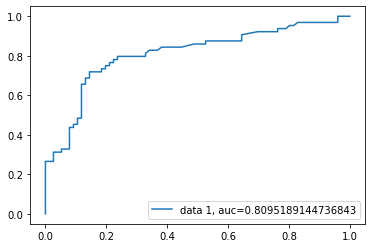

In [106]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


As you can see, when I removed the 3 features ("Daily Work Load Average", "Distance to Work", "Day of the Week") I thought to be ineffective from the dataset, the area under the ROC curve had grown, the AUC approached from 0.80 to 0.81, and the success of our model increased slightly. 

As a result, we have seen that the success of the Logistic Regression model in this dataset is around 80% when It showed me that the features "Reason_1","Reason_3","Reason_4","Transportation Expense" and "children" the most important ones and the fetaures "Daily Work Load Average", "Distance to Work", "Day of the Week" are the less.


Now in our dataset I will save the target column to the folder in binary form.

In [353]:
data_with_targets.to_csv("/Users/nb/Desktop/Bt/ITU/Proje/Absenteeism_binary.csv", index = False)